# imports

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
path = Path.cwd()/'logs'
path

PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs')

In [3]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/activeadam_0.05_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/adamw_0.01_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/activeadam_0.0005_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/activebelief_0.01_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/activeadam_0.005_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/activeadam_5e-05_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/sgd_5e-06_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/adabelief_0.01_2_0_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/VOC decay0/logs/sgd_0.0005_2_0_42.json'),
 PosixPath('/Users/da

In [4]:
f = files[0]
fname = f.stem
meta = fname.split('_')
meta

['activeadam', '0.05', '2', '0', '42']

For SGDs, we use lr_range = lr_range * 50

In [5]:
lrMin = 1e-7
lrMax = 5e-4

lrMinSGD = 5e-5
lrMaxSGD = lrMax * 50
lrMin, lrMax, lrMinSGD, lrMaxSGD

(1e-07, 0.0005, 5e-05, 0.025)

In [6]:
def extract_meta(f):
    fname = f.stem
    meta = fname.split('_')
    optim = meta[0]
    lr = float(meta[1])
#     wd = float(meta[2])
#     scheduler = ((meta[3]).split('.'))[1]
    bs = int(meta[2])
    wd = float(meta[3])
    seed = int(meta[4])
    try:
        with open(f, 'r') as file:
            data = json.load(file)
    except:
        print(f)
    return optim, lr, bs, wd, seed, data

In [7]:
dictt = {
    
    'optim':[],
    'lr':[],
    'bs':[],
    'wd':[],
    'seed':[],
    'best_95':[],
    'best_test':[],
    'train_losses':[],
    'mAP_5_95_IoUs':[],
    'mAP_5_IoUs':[],
    'epoch_time':[],
    'epochs':[],
    'max_epochs':[],
}
for f in files:
    optim, lr, bs, wd, seed, data = extract_meta(f)
    
    if (optim=='sgd' or optim=='activesgd') and (lr>lrMaxSGD or lr<lrMinSGD):
        continue
    if (optim!='sgd' and optim!='activesgd') and (lr>lrMax or lr<lrMin):
        continue
    
#     if bs!=128:
#         continue
    
    dictt['optim'].append(optim)
    dictt['lr'].append(lr)
    dictt['wd'].append(wd)
#     dictt['scheduler'].append(scheduler)
    dictt['bs'].append(bs)
    dictt['seed'].append(seed)
    dictt['mAP_5_95_IoUs'].append(np.array(data.get('mAP_5_95_IoUs')))
    dictt['mAP_5_IoUs'].append(np.array(data.get('mAP_5_IoUs')))
    dictt['best_95'].append(max(data.get('mAP_5_95_IoUs')))
    dictt['best_test'].append(max(data.get('mAP_5_IoUs')))
    dictt['train_losses'].append(data.get('train_losses'))

    dictt['epoch_time'].append(data.get('epoch_time'))
    dictt['epochs'].append(data.get('epochs'))
    dictt['max_epochs'].append(max(data.get('epochs')))
dictt

{'optim': ['activeadam',
  'activeadam',
  'sgd',
  'activesgd',
  'adabelief',
  'activebelief',
  'adamw',
  'adabelief',
  'activesgd',
  'activesgd',
  'adabelief',
  'adamw',
  'activebelief',
  'adamw',
  'activesgd',
  'sgd',
  'sgd',
  'activeadam',
  'activebelief',
  'activeadam',
  'activeadam',
  'sgd',
  'activebelief',
  'adamw',
  'adabelief',
  'activesgd',
  'adabelief',
  'adamw',
  'sgd',
  'adabelief',
  'adamw',
  'activebelief',
  'sgd',
  'activesgd',
  'activebelief',
  'activeadam'],
 'lr': [0.0005,
  5e-05,
  0.0005,
  0.01,
  0.0005,
  5e-05,
  1e-06,
  1e-06,
  0.005,
  5e-05,
  1e-05,
  1e-05,
  5e-06,
  0.0001,
  0.0001,
  0.005,
  5e-05,
  5e-06,
  0.0001,
  1e-05,
  0.0001,
  0.0001,
  1e-05,
  5e-06,
  5e-06,
  0.001,
  0.0001,
  0.0005,
  0.01,
  5e-05,
  5e-05,
  1e-06,
  0.001,
  0.0005,
  0.0005,
  1e-06],
 'bs': [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,

In [8]:
df = pd.DataFrame(dictt)
df.head()

optim       lr  bs   wd  seed   best_95  best_test  \
0  activeadam  0.00050   2  0.0    42  0.099249   0.256504   
1  activeadam  0.00005   2  0.0    42  0.412337   0.698761   
2         sgd  0.00050   2  0.0    42  0.393193   0.719423   
3   activesgd  0.01000   2  0.0    42  0.377213   0.664173   
4   adabelief  0.00050   2  0.0    42  0.331926   0.617085   

                                        train_losses  \
0  [0.6264846324920654, 0.5245238542556763, 0.587...   
1  [0.5346417427062988, 0.4306092858314514, 0.433...   
2  [0.5535373687744141, 0.4569006860256195, 0.479...   
3  [0.5672189593315125, 0.44821634888648987, 0.46...   
4  [0.5780791640281677, 0.4602453112602234, 0.505...   

                                       mAP_5_95_IoUs  \
0  [0.025960416745176015, 0.06259220377028638, 0....   
1  [0.1709568547189744, 0.27667076069651814, 0.30...   
2  [0.16473524560567035, 0.2540864392402738, 0.27...   
3  [0.14266422342202106, 0.24368709954728324, 0.2...   
4  [0.11505604219462598, 0.20863849199556025, 0.2...   

                                          mAP_5_IoUs   epoch_time  \
0  [0.08096837880832028, 0.16627015503446252, 0.2...  2820.326608   
1  [0.4199397087612014, 0.5816586717000215, 0.625...  3180.585356   
2  [0.42836270489890793, 0.5659191451977782, 0.60...  2729.086505   
3  [0.36692376029625956, 0.5386204038541604, 0.55...  4992.958857   
4  [0.2950878757297609, 0.46390668314629907, 0.51...  4692.519445   

                                              epochs  max_epochs  
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...          19  
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...          19  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...          19  
3  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...          19  
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...          19

In [9]:
df['best_epoch'] = df['mAP_5_IoUs'].apply(np.argmax)
df.drop(columns=['seed', 'wd', 'epochs'], inplace=True)
df

optim        lr  bs   best_95  best_test  \
0     activeadam  0.000500   2  0.099249   0.256504   
1     activeadam  0.000050   2  0.412337   0.698761   
2            sgd  0.000500   2  0.393193   0.719423   
3      activesgd  0.010000   2  0.377213   0.664173   
4      adabelief  0.000500   2  0.331926   0.617085   
5   activebelief  0.000050   2  0.418573   0.725150   
6          adamw  0.000001   2  0.313425   0.648602   
7      adabelief  0.000001   2  0.241307   0.550348   
8      activesgd  0.005000   2  0.412664   0.707852   
9      activesgd  0.000050   2  0.330913   0.666282   
10     adabelief  0.000010   2  0.375690   0.707424   
11         adamw  0.000010   2  0.411243   0.725316   
12  activebelief  0.000005   2  0.366705   0.704332   
13         adamw  0.000100   2  0.352798   0.633275   
14     activesgd  0.000100   2  0.358827   0.698423   
15           sgd  0.005000   2  0.406721   0.702864   
16           sgd  0.000050   2  0.304402   0.635921   
17    activeadam  0.000005   2  0.398637   0.724235   
18  activebelief  0.000100   2  0.423984   0.719017   
19    activeadam  0.000010   2  0.415549   0.726419   
20    activeadam  0.000100   2  0.357377   0.637438   
21           sgd  0.000100   2  0.342332   0.684348   
22  activebelief  0.000010   2  0.387138   0.713379   
23         adamw  0.000005   2  0.386270   0.719527   
24     adabelief  0.000005   2  0.349682   0.689051   
25     activesgd  0.001000   2  0.410124   0.724717   
26     adabelief  0.000100   2  0.417570   0.715731   
27         adamw  0.000500   2  0.101458   0.255456   
28           sgd  0.010000   2  0.372062   0.659693   
29     adabelief  0.000050   2  0.409717   0.719022   
30         adamw  0.000050   2  0.412421   0.696081   
31  activebelief  0.000001   2  0.272425   0.596136   
32           sgd  0.001000   2  0.399199   0.718547   
33     activesgd  0.000500   2  0.404012   0.720782   
34  activebelief  0.000500   2  0.336424   0.626262   
35    activeadam  0.000001   2  0.337660   0.678747   

                                         train_losses  \
0   [0.6264846324920654, 0.5245238542556763, 0.587...   
1   [0.5346417427062988, 0.4306092858314514, 0.433...   
2   [0.5535373687744141, 0.4569006860256195, 0.479...   
3   [0.5672189593315125, 0.44821634888648987, 0.46...   
4   [0.5780791640281677, 0.4602453112602234, 0.505...   
5   [0.5470107197761536, 0.44116535782814026, 0.45...   
6   [0.5945188403129578, 0.5052535533905029, 0.562...   
7   [0.6539908051490784, 0.5272586941719055, 0.594...   
8   [0.5532261729240417, 0.4252638816833496, 0.442...   
9   [0.6193231344223022, 0.5048186182975769, 0.589...   
10  [0.5679012537002563, 0.4685744345188141, 0.514...   
11  [0.5328081250190735, 0.41558632254600525, 0.43...   
12  [0.5955062508583069, 0.4946044981479645, 0.535...   
13  [0.5738754868507385, 0.45985326170921326, 0.45...   
14  [0.6068999767303467, 0.4843897819519043, 0.555...   
15  [0.5598472952842712, 0.4283018708229065, 0.448...   
16  [0.6230419874191284, 0.5079927444458008, 0.589...   
17  [0.5566046833992004, 0.45622944831848145, 0.47...   
18  [0.5362498164176941, 0.4367064833641052, 0.452...   
19  [0.5402184128761292, 0.4251348376274109, 0.435...   
20  [0.5555502772331238, 0.46527019143104553, 0.47...   
21  [0.6091799139976501, 0.4918379783630371, 0.553...   
22  [0.5831643342971802, 0.46954503655433655, 0.50...   
23  [0.5544819831848145, 0.4480626583099365, 0.462...   
24  [0.6013683080673218, 0.47950583696365356, 0.53...   
25  [0.5580655932426453, 0.4432005286216736, 0.470...   
26  [0.5242016315460205, 0.429206520318985, 0.4368...   
27  [0.6260611414909363, 0.5048739910125732, 0.596...   
28  [0.5407921075820923, 0.45966964960098267, 0.46...   
29  [0.5532412528991699, 0.4438173174858093, 0.448...   
30  [0.5309743881225586, 0.42885637283325195, 0.45...   
31  [0.6436278820037842, 0.5262290239334106, 0.586...   
32  [0.5532057881355286, 0.4348660409450531, 0.461...   
33  [0.5500901937484741, 0.4574407935

# all optims

## best test

In [10]:
pivot = df.pivot_table('best_test', df.optim, df.lr, aggfunc='max')
pivot

lr            0.000001  0.000005  0.000010  0.000050  0.000100  0.000500  \
optim                                                                      
activeadam    0.678747  0.724235  0.726419  0.698761  0.637438  0.256504   
activebelief  0.596136  0.704332  0.713379  0.725150  0.719017  0.626262   
activesgd          NaN       NaN       NaN  0.666282  0.698423  0.720782   
adabelief     0.550348  0.689051  0.707424  0.719022  0.715731  0.617085   
adamw         0.648602  0.719527  0.725316  0.696081  0.633275  0.255456   
sgd                NaN       NaN       NaN  0.635921  0.684348  0.719423   

lr            0.001000  0.005000  0.010000  
optim                                       
activeadam         NaN       NaN       NaN  
activebelief       NaN       NaN       NaN  
activesgd     0.724717  0.707852  0.664173  
adabelief          NaN       NaN       NaN  
adamw              NaN       NaN       NaN  
sgd           0.718547  0.702864  0.659693

In [11]:
pivot_ = pivot.transpose()
pivot_

pivot_ = pivot_[['activeadam','adamw', 
                 'activebelief','adabelief',
#                  'activeradam', 'radam',  
                 'activesgd', 'sgd'  
                ]]
pivot_= pivot_.rename(columns={
                       'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
#                        'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
#                        'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim     ActiveAdamW     AdamW  ActiveBelief  AdaBelief  ActiveSGD       SGD
lr                                                                           
0.000001     0.678747  0.648602      0.596136   0.550348        NaN       NaN
0.000005     0.724235  0.719527      0.704332   0.689051        NaN       NaN
0.000010     0.726419  0.725316      0.713379   0.707424        NaN       NaN
0.000050     0.698761  0.696081      0.725150   0.719022   0.666282  0.635921
0.000100     0.637438  0.633275      0.719017   0.715731   0.698423  0.684348
0.000500     0.256504  0.255456      0.626262   0.617085   0.720782  0.719423
0.001000          NaN       NaN           NaN        NaN   0.724717  0.718547
0.005000          NaN       NaN           NaN        NaN   0.707852  0.702864
0.010000          NaN       NaN           NaN        NaN   0.664173  0.659693

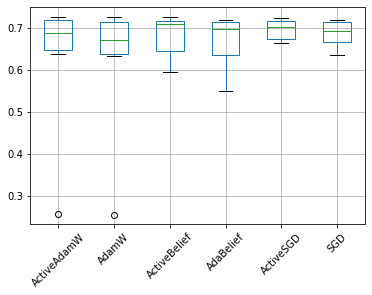

In [12]:
# pivot_ = pivot_.iloc[:-4]
ax = pivot_.boxplot(rot=45)

In [13]:
fig = ax.get_figure()

In [14]:
fig.savefig('./pascalvoc.png', dpi=300, bbox_inches='tight')

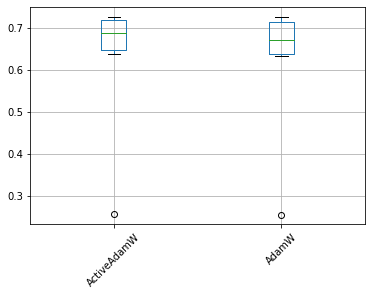

In [15]:
ax1 = pivot_[['ActiveAdamW', 'AdamW']].boxplot(rot=45)

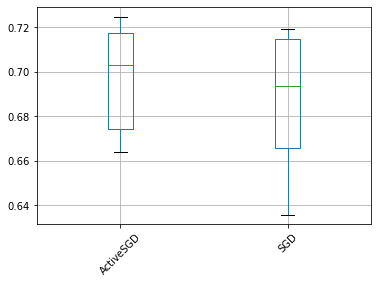

In [16]:
ax2 = pivot_[['ActiveSGD', 'SGD']].iloc[2:].boxplot(rot=45)

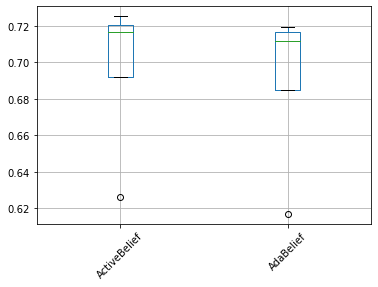

In [17]:
ax3 = pivot_[['ActiveBelief', 'AdaBelief']].iloc[2:].boxplot(rot=45)

In [18]:
fig = ax1.get_figure()

In [19]:
fig.savefig('./pascalvoc_adam.png', dpi=300, bbox_inches='tight')

In [20]:
fig = ax2.get_figure()

In [21]:
fig.savefig('./pascalvoc_sgd.png', dpi=300, bbox_inches='tight')

In [22]:
fig = ax3.get_figure()

In [23]:
fig.savefig('./pascalvoc_adabelief.png', dpi=300, bbox_inches='tight')

## train loss

In [63]:
def find_best_train(row):
    best = float('inf')
    for ppl in row['train_losses']:
        if ppl<best: 
            best=ppl
        else:
            break
    return best

In [64]:
df['best_train'] = df.apply(find_best_train, axis=1)
df['best_train_ppl'] = df['best_train'].map(lambda x: np.exp(x))
df.head()

optim            lr   bs   best_ppl  best_test  \
0         sgd  1.000000e-03  128   9.591887  10.295506   
1       adamw  5.000000e-06  128   9.610747  10.028126   
2       adamw  5.000000e-05  128   8.972414   9.646077   
3  activeadam  1.000000e-07  128  12.081543  12.432597   
4         sgd  1.000000e-04  128  14.621952  15.113110   

                                        train_losses  \
0  [4.269722938537598, 3.956637144088745, 3.85395...   
1  [4.694464206695557, 3.7752649784088135, 3.5433...   
2  [3.465231418609619, 2.8220975399017334, 2.6657...   
3  [7.878540992736816, 7.192812919616699, 6.88390...   
4  [4.918905258178711, 4.484518051147461, 4.33334...   

                                           test_ppls   epoch_time  max_epochs  \
0  [55.49868513572967, 49.24029553175281, 44.1821...  1751.424587         199   
1  [49.670218164707, 36.43654422372913, 28.914009...  2311.011858         199   
2  [17.354904736992314, 13.516293756984636, 11.76...  1372.467484         199   
3  [1480.660949433463, 1097.1541059025099, 807.76...  1837.093704         199   
4  [100.50242016688107, 81.17283899741643, 72.490...  1724.276411         199   

   best_epoch  best_train  best_train_ppl  
0         198    2.425533       11.308250  
1         199    2.438076       11.450994  
2         198    2.355889       10.547502  
3         199    2.662483       14.331837  
4         199    2.840662       17.127096

In [65]:
pivot = df.pivot_table('best_train_ppl', df.optim, df.lr, aggfunc='min')
pivot

lr          1.000000e-07  5.000000e-07  1.000000e-06  5.000000e-06  \
optim                                                                
activeadam     14.331837     12.073717     11.454347     10.964381   
activesgd            NaN           NaN           NaN     23.707903   
adamw          26.695700     15.566731     13.382423     11.450994   
sgd                  NaN           NaN           NaN     56.119132   

lr          1.000000e-05  5.000000e-05  1.000000e-04  5.000000e-04  \
optim                                                                
activeadam     10.769436     10.535599     10.495638     10.430704   
activesgd      17.902138     12.970161     12.234832     11.023934   
adamw          10.916894     10.547502     10.459681     10.423795   
sgd            49.750609     22.919008     17.127096     12.007590   

lr          1.000000e-03  5.000000e-03  1.000000e-02  5.000000e-02  \
optim                                                                
activeadam     10.447060     10.506492     11.799742           NaN   
activesgd      10.876233     10.711492     10.653941     10.535102   
adamw          10.464443     10.651409     16.219316           NaN   
sgd            11.308250     10.792127     10.701345     10.553049   

lr          1.000000e-01  
optim                     
activeadam           NaN  
activesgd      10.535504  
adamw                NaN  
sgd            10.559633

In [66]:
pivot_ = pivot.transpose()
pivot_

optim         activeadam  activesgd      adamw        sgd
lr                                                       
1.000000e-07   14.331837        NaN  26.695700        NaN
5.000000e-07   12.073717        NaN  15.566731        NaN
1.000000e-06   11.454347        NaN  13.382423        NaN
5.000000e-06   10.964381  23.707903  11.450994  56.119132
1.000000e-05   10.769436  17.902138  10.916894  49.750609
5.000000e-05   10.535599  12.970161  10.547502  22.919008
1.000000e-04   10.495638  12.234832  10.459681  17.127096
5.000000e-04   10.430704  11.023934  10.423795  12.007590
1.000000e-03   10.447060  10.876233  10.464443  11.308250
5.000000e-03   10.506492  10.711492  10.651409  10.792127
1.000000e-02   11.799742  10.653941  16.219316  10.701345
5.000000e-02         NaN  10.535102        NaN  10.553049
1.000000e-01         NaN  10.535504        NaN  10.559633

In [67]:
pivot_ = pivot_[['activeadam', 'activesgd', 'adamw', 'sgd']]
pivot_= pivot_.rename(columns={
                       'activeadam':'ActiveAdamW', 
#                        'activebelief': 'ActiveBelief', 
#                        'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
#                        'adabelief': 'AdaBelief',
#                        'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim         ActiveAdamW  ActiveSGD      AdamW        SGD
lr                                                        
1.000000e-07    14.331837        NaN  26.695700        NaN
5.000000e-07    12.073717        NaN  15.566731        NaN
1.000000e-06    11.454347        NaN  13.382423        NaN
5.000000e-06    10.964381  23.707903  11.450994  56.119132
1.000000e-05    10.769436  17.902138  10.916894  49.750609
5.000000e-05    10.535599  12.970161  10.547502  22.919008
1.000000e-04    10.495638  12.234832  10.459681  17.127096
5.000000e-04    10.430704  11.023934  10.423795  12.007590
1.000000e-03    10.447060  10.876233  10.464443  11.308250
5.000000e-03    10.506492  10.711492  10.651409  10.792127
1.000000e-02    11.799742  10.653941  16.219316  10.701345
5.000000e-02          NaN  10.535102        NaN  10.553049
1.000000e-01          NaN  10.535504        NaN  10.559633

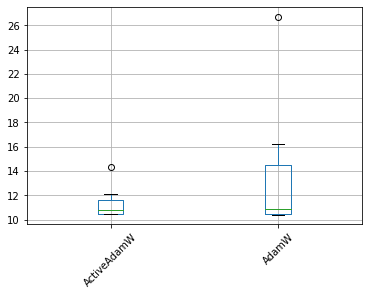

In [68]:
ax1 = pivot_[['ActiveAdamW', 'AdamW']].boxplot(rot=45)

In [69]:
fig = ax1.get_figure()

In [70]:
fig.savefig('./wiki103trainppladam.png', dpi=300, bbox_inches='tight')

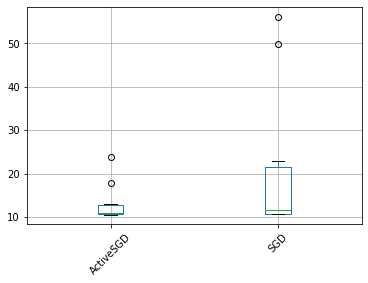

In [71]:
ax2 = pivot_[['ActiveSGD', 'SGD']].boxplot(rot=45)

In [72]:
fig = ax2.get_figure()

In [73]:
fig.savefig('./wiki103trainpplsgd.png', dpi=300, bbox_inches='tight')